In [192]:
from sklearn import datasets
import pandas as pd
import numpy as np

#### Prepare data

In [193]:
# Load Iris dataset
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

# Make it binary, There is 3 classes [0,1,2], drop y == 2
X = X.drop(y[y == 2].index)
y = y.drop(y[y == 2].index)

In [194]:
avg_X = np.average(X, axis=1)

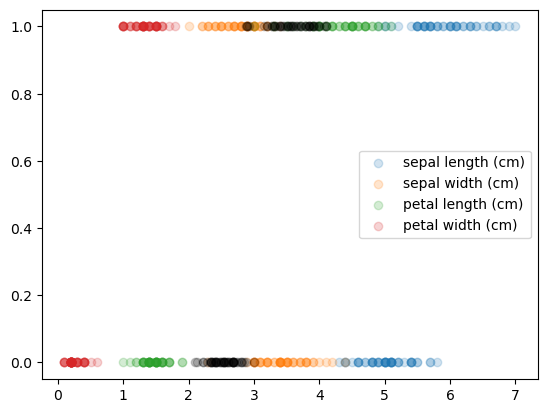

In [195]:
# Ever wonder, why many X, w, how it combine together?

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Each feature has diffrent to predict y
# This the bigger the 1, w of this feature should be +
ax.scatter(X.iloc[:,0], y, alpha=0.2)
# Only this one ther smaller the 1, w of this feature should be -
ax.scatter(X.iloc[:,1], y, alpha=0.2)
ax.scatter(X.iloc[:,2], y, alpha=0.2)
ax.scatter(X.iloc[:,3], y, alpha=0.2)
# For w of not relavant feature should be 0

# This is the avg of all features
ax.scatter(avg_X, y, c='k', alpha=0.2)
ax.legend(X)

plt.show()

# we need to adjust w1,w2,w3,w4 that when sigmoid(wTx + b) then the line is fit to the black dot

In [196]:
n_sample = X.shape[0]
n_feature = X.shape[1]

w = np.random.uniform(0, 0.1, [n_feature])
b = 0.5


def net_input(X, w, b):
    net_input = X.dot(w.T) + b
    return net_input


def activation(net_input):
    return 1.0 / (1 + np.exp(-net_input))


def logloss(target, predict):
    logloss = target * np.log(predict) + ((1-target) * np.log(1-predict))
    return logloss


def gradient(X, y, y_pred, learning_rate):
    
    error = y_pred - y
    
    # grad_w = error.T.dot(np.array(X)) / X.shape[0]
    grad_w = learning_rate * np.average((error * X.T).T, axis=0)
    # grad_b = error.sum() / X.shape[0]
    grad_b = learning_rate * np.average(error, axis=0)
    
    return grad_w, grad_b

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 : \text{where } \hat{y} = h(x_i) = wx + b$

We need partial derivetive instead

This mean finding the slope (rate of change) of w and b. using chain rule

$ \text{Gradient Descent = } \frac{2}{n} \sum_{i=1}^{n} [(\hat{y}_i - y_i)x_i] $

In [197]:
z = net_input(X, w, b)
y_pred = activation(z)

loss = logloss(y, y_pred)
np.average(loss)

-0.7141867020052576

In [198]:
grad_w, grad_b = gradient(X, y, y_pred, 2)

In [199]:
w = w - grad_w
b = b - grad_b

In [200]:
w_list = []
b_list = []

for i in range(100):
    z = net_input(X, w, b)
    predict = activation(z)
    
    loss = logloss(y, predict)
    print(np.average(loss))
    
    error = predict - y
    grad_w = 2 * np.average((error * X.T).T, axis=0)
    grad_b = 2 * np.average(error, axis=0)
    
    w = w - grad_w
    b = b - grad_b

    w_list.append(w)
    b_list.append(b)

-4.985663845599004
nan
-0.011377029824205336
-0.007461937533015876
-0.006956909482852742
-0.006782778812642816
-0.006666781854154802
-0.006563694513278155
-0.006465507780655263
-0.006370670845686336
-0.006278785121866834
-0.0061896691375165494
-0.006103188781777849
-0.0060192250731929
-0.005937667479524117
-0.005858412183507506
-0.005781361367128466
-0.005706422736334035
-0.005633509124170375
-0.00556253813539773
-0.005493431822151827
-0.005426116386237177
-0.0053605219052156525
-0.0052965820800140485
-0.0052342340020764214
-0.005173417938306576
-0.005114077132228976
-0.005056157619954318
-0.0049996080596765
-0.004944379573551192
-0.004890425600917273
-0.004837701761920643
-0.0047861657306887025
-0.004735777117281981
-0.004686497357721099
-0.00463828961144996
-0.004591118665654169
-0.004544950845904351
-0.004499753932640845
-0.004455497083058137
-0.004412150757985145
-0.004369686653391509
-0.004328077636181438
-0.0042872976839642704
-0.004247321828517016
-0.004208126102676445
-0.004169

/Users/krit/homebrew/anaconda3/envs/dataeng/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


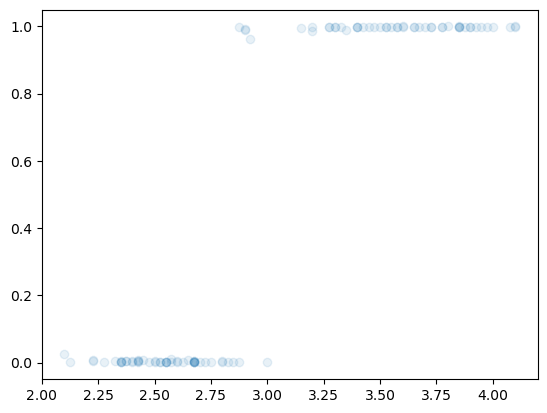

In [201]:
fig, ax = plt.subplots()

# Each feature has diffrent to predict y
#for i in range(0, len(w_list)):
ax.scatter(avg_X, activation(net_input(X, w_list[99], b_list[99])), alpha=0.1)
    
#ax.scatter(avg_X, y, c='k', alpha=0.2)
    
plt.show()

In [202]:
print(f'loss = {loss.iloc[-1]}')
print(w)
print(b)

loss = -0.0014382833312041143
[-0.75189591 -2.54039759  3.83225297  1.68099555]
0.052963989067360155


In [203]:
# Wrap it togther
class BaseModel:
    
    def fit(X,y):
        pass
    
    def predict(y, y_pred):
        pass
    
    
class BinaryLogisticRegression(BaseModel):

    def _net_input(self, X, w, b):
        net_input = X.dot(w.T) + b
        return net_input


    def _activation(self, net_input):
        return 1.0 / (1 + np.exp(-net_input))


    def _logloss(self, target, predict):
        logloss = target * np.log(predict) + ((1-target) * np.log(1-predict))
        return logloss


    def _gradient(self, X, y, y_pred, learning_rate):
        
        error = y_pred - y
        
        # grad_w = error.T.dot(np.array(X)) / X.shape[0]
        grad_w = learning_rate * np.average((error * X.T).T, axis=0)
        # grad_b = error.sum() / X.shape[0]
        grad_b = learning_rate * np.average(error, axis=0)
        
        return grad_w, grad_b
    
    
    def fit(self, X, y, iter):
        
        self.X = X
        self.y = y
        
        n_feature = X.shape[1]

        self.w = np.random.uniform(0, 0.1, [n_feature])
        self.b = 0.5

        for _ in range(iter):
            
            z = self._net_input(X, self.w, self.b)
            
            self.y_pred = self._activation(z)
            error = self.y_pred - y
            
            grad_w = 2 * np.average((error * X.T).T, axis=0)
            grad_b = 2 * np.average(error, axis=0)

            self.w = self.w - grad_w
            self.b = self.b - grad_b

        
    def predict(self, X):
        
        z = net_input(X, self.w, self.b)
        y_pred = activation(z)
        
        return (y_pred > 0.5).astype(int)

In [204]:
X_sim = X.drop(['petal length (cm)',	'petal width (cm)'], axis=1)

In [205]:
model = BinaryLogisticRegression()
model.fit(X_sim, y, 100)
model.predict(X_sim)

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64

In [206]:
def plot_decision_boundary(X, y, model):
    # Generate a grid of points for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

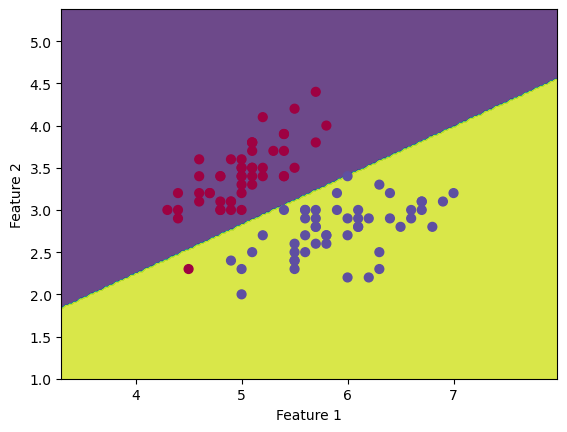

In [211]:
plot_decision_boundary(X_sim.to_numpy(), y.to_numpy(), model)